# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[27 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Завантаження даних
data = pd.read_csv('creditcard.csv')

# 2. Масштабування ознак
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled.iloc[:, :-1] = scaler.fit_transform(data_scaled.iloc[:, :-1])  # Масштабування всіх стовпців, окрім 'Class'

# 3. Розділення даних на навчальну та тестову вибірки
X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір навчальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір навчальної вибірки: (227845, 30)
Розмір тестової вибірки: (56962, 30)


In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix


# 1. Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_train)
isolation_predictions = isolation_forest.predict(X_test)
isolation_predictions = [1 if x == -1 else 0 for x in isolation_predictions]  # Змінюємо -1 на 1 для аномалій

# 2. One-Class SVM
oc_svm = OneClassSVM(gamma='auto', nu=0.01)
oc_svm.fit(X_train)
svm_predictions = oc_svm.predict(X_test)
svm_predictions = [1 if x == -1 else 0 for x in svm_predictions]  # Змінюємо -1 на 1 для аномалій

# 3. Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof_predictions = lof.fit_predict(X_test)
lof_predictions = [1 if x == -1 else 0 for x in lof_predictions]  # Змінюємо -1 на 1 для аномалій

#Звіт про класифікацію
print("--- Isolation Forest ---")
print(classification_report(y_test, isolation_predictions))

print("--- One-Class SVM ---")
print(classification_report(y_test, svm_predictions))

print("--- Local Outlier Factor ---")
print(classification_report(y_test, lof_predictions))

#Матриця плутанини
print("--- Матриця плутанини для Isolation Forest ---")
print(confusion_matrix(y_test, isolation_predictions))

print("--- Матриця плутанини для One-Class SVM ---")
print(confusion_matrix(y_test, svm_predictions))

print("--- Матриця плутанини для Local Outlier Factor ---")
print(confusion_matrix(y_test, lof_predictions))

--- Isolation Forest ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.63      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.81      0.59     56962
weighted avg       1.00      0.99      0.99     56962

--- One-Class SVM ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.07      0.55      0.13        98

    accuracy                           0.99     56962
   macro avg       0.54      0.77      0.56     56962
weighted avg       1.00      0.99      0.99     56962

--- Local Outlier Factor ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.01      0.07      0.02        98

    accuracy                           0.99     56962
   macro avg       0.51      0.53      0.51     5696

Epoch [10/100], Loss: 1.2499
Epoch [20/100], Loss: 1.2414
Epoch [30/100], Loss: 1.2319
Epoch [40/100], Loss: 1.2204
Epoch [50/100], Loss: 1.2059
Epoch [60/100], Loss: 1.1868
Epoch [70/100], Loss: 1.1617
Epoch [80/100], Loss: 1.1304
Epoch [90/100], Loss: 1.0952
Epoch [100/100], Loss: 1.0611
Поріг для аномалій: 1.9582
--- Звіт про класифікацію для автоенкодера ---
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



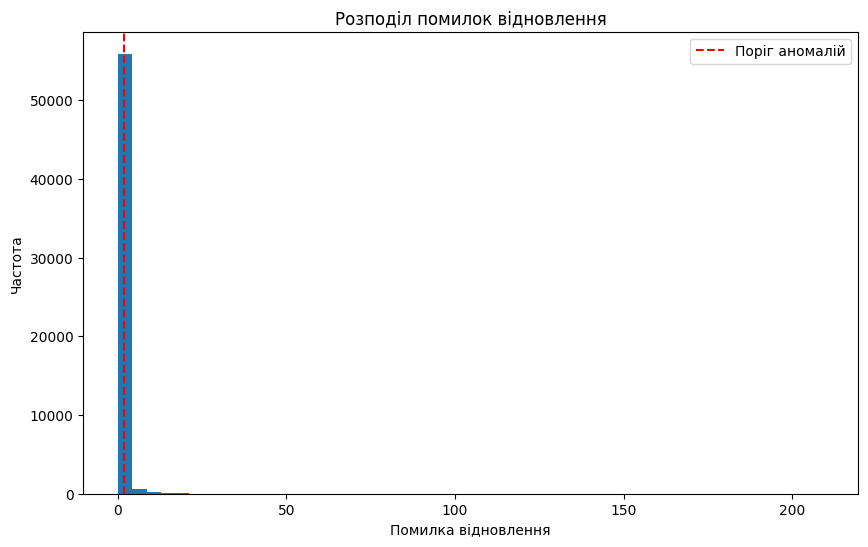

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Перетворення даних у тензори
X_train_tensor = torch.FloatTensor(X_train.values) 
X_test_tensor = torch.FloatTensor(X_test.values)    


# Визначення архітектури автоенкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_train.shape[1], 14),
            nn.ReLU(),
            nn.Linear(14, 7)
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, 14),
            nn.ReLU(),
            nn.Linear(14, X_train.shape[1]),
            nn.Sigmoid()  # Використовуємо Sigmoid для нормалізації виходу
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Ініціалізація моделі, функції втрат та оптимізатора
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Навчання моделі
num_epochs = 100
for epoch in range(num_epochs):
    # Прямий прохід
    outputs = autoencoder(X_train_tensor)
    loss = criterion(outputs, X_train_tensor)
    
    # Зворотний прохід та оптимізація
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Відновлення даних та обчислення помилок
with torch.no_grad():
    X_test_reconstructed = autoencoder(X_test_tensor)
    reconstruction_errors = torch.mean((X_test_reconstructed - X_test_tensor) ** 2, dim=1)

# Визначення порогу для аномалій
threshold = np.percentile(reconstruction_errors.numpy(), 95)  # Поріг на основі 95-го процентиля
print(f'Поріг для аномалій: {threshold:.4f}')

# Ідентифікація аномалій
anomalies = reconstruction_errors > threshold
anomaly_labels = [1 if anomaly else 0 for anomaly in anomalies]

# Звіт про класифікацію
print("--- Звіт про класифікацію для автоенкодера ---")
print(classification_report(y_test, anomaly_labels))

# Візуалізація помилок відновлення
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors.numpy(), bins=50)
plt.axvline(threshold, color='r', linestyle='--', label='Поріг аномалій')
plt.xlabel('Помилка відновлення')
plt.ylabel('Частота')
plt.title('Розподіл помилок відновлення')
plt.legend()
plt.show()

### **Звіт**

#### **1. Порівняння методів**
**One-Class SVM:**

Precision: 0.07
Recall: 0.55
F1-score: 0.13
Accuracy: 99%

Матриця плутанини:
Клас 0 (нормальні записи): 56191 вірно класифікованих, 673 помилково класифікованих.
Клас 1 (аномалії): 44 вірно класифіковані, 54 помилково класифіковані.

**Local Outlier Factor (LOF):**

Precision: 0.01
Recall: 0.07
F1-score: 0.02
Accuracy: 99%

Матриця плутанини:
Клас 0: 56301 вірно класифікованих, 563 помилково класифікованих.
Клас 1: 91 вірно класифіковані, 7 помилково класифіковані.

**Isolation Forest:**

Precision: 0.10
Recall: 0.63
F1-score: 0.17
Accuracy: 99%

Матриця плутанини:
Клас 0: 56318 вірно класифікованих, 546 помилково класифікованих.
Клас 1: 36 вірно класифіковані, 62 помилково класифіковані.

**Автоенкодер:**

Precision: 0.03
Recall: 0.90
F1-score: 0.06
Accuracy: 95%

Матриця плутанини:
Клас 0: 1.00 точність, 95% відсотків нормальних записів класифіковано правильно.
Клас 1: 0.03 точність, 90% відсотків аномалій виявлено, але з низькою точністю.

#### **2. Аналіз результатів**

**Найкращий метод: Isolation Forest** продемонстрував найкращу точність виявлення аномалій серед усіх методів, однак його **precision** залишався низьким, що означає, що багато нормальних записів помилково класифікуються як аномалії.

**One-Class SVM** також продемонстрував непогані результати з точністю 99%, але знову ж таки, виявлення аномалій (клас 1) було недостатнім, з високим відсотком помилкових позитивних.

**Local Outlier Factor** показав найгірші результати, особливо в виявленні аномалій. Цей метод, схоже, не зміг адекватно ідентифікувати аномалії в даних.

**Автоенкодер** продемонстрував високу чутливість (recall), але низьку точність. Це означає, що він виявляв багато аномалій, але з високим рівнем помилок, оскільки більшість нормальних записів також ідентифікувалися як аномальні.

#### **3. Висновки щодо використання глибоких нейронних мереж**

Автоенкодери можуть бути корисними для виявлення аномалій, особливо в випадках, коли структура даних є складною або високорозмірною. Вони вчаться відновлювати нормальні зразки, тому можуть виявляти аномалії на основі відмінностей у відновлених та вхідних даних.